# Exploratory Data Analysis

The purpose of this file is to perform basic analysis and create descriptive visualizations that assist in the study of the California Community College system.

In [27]:
import scripts.cccco as cccco
import scripts.college_scorecard as scorecard
import scripts.labor_market as labor_market
import scripts.join_tools as join_tools

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

## College and District Location

In [9]:
all_colleges = cccco.get_ccc_colleges()
all_districts = cccco.get_ccc_districts()

In [10]:
print(f"{all_colleges.shape[0]:,} rows")
all_colleges.head()

115 rows


,CollegeID,CollegeName,DistrictID,StreetAddress,City,County,Zip,ZipPlus4,MailingAddress,MailingCity,MailingZip,Phone,WebsiteURL,Latitude,Longitude,LogoURL,District
0,021,Cuyamaca College,020,900 Rancho San Diego Parkway,El Cajon,San Diego,92019,4304,900 Rancho San Diego Parkway,El Cajon,92019,619.660.4000,www.cuyamaca.edu,32.744890,-116.935229,CuyamacaCollegeLogo.jpg,None
1,022,Grossmont College,020,8800 Grossmont College Drive,El Cajon,San Diego,92020,1799,8800 Grossmont College Drive,El Cajon,92020,619.644.7000,www.grossmont.edu,32.817897,-117.005640,GrossmontCollegelogo.jpg,None
2,031,Imperial Valley College,030,380 East Aten Road,Imperial,Imperial,92251,9787,380 East Aten Road,Imperial,92251,760.352.8320,www.imperial.edu,32.825859,-115.502999,ImperialValleyCollegeLogocopy.jpg,None
3,051,MiraCosta College,050,1 Barnard Drive,Oceanside,San Diego,92056,3899,1 Barnard Drive,Oceanside,92056,760.757.2121,www.miracosta.edu,33.188864,-117.301064,Mira_Costa_College_Logo_4c.png,None
4,061,Palomar College,060,1140 West Mission Road,San Marcos,San Diego,92069,1487,1140 West Mission Road,San Marcos,92069,760.744.1150,www.palomar.edu,33.147015,-117.183980,PalomarCollegeLogo.jpg,None


In [11]:
print(f"{all_districts.shape[0]:,} rows")
all_districts.head()

73 rows


,DistrictID,DistrictName,DistrictTitle,StreetAddress,City,Zip,Phone,WebsiteURL,Boundaries,Colleges
0,020,Grossmont-Cuyamaca ...,Grossmont-Cuyamaca Community College District,8800 Grossmont College Drive,El Cajon,92020,619-644-7010,www.gcccd.edu,None,"[{'CollegeID': '021', 'CollegeName': 'Cuyamaca..."
1,030,Imperial ...,Imperial Community College District,380 E. Aten Road (PO Box 158),Imperial,92251,760-352-8320,www.imperial.edu,None,"[{'CollegeID': '031', 'CollegeName': 'Imperial..."
2,050,MiraCosta ...,MiraCosta Community College District,None,None,None,None,www.miracosta.edu,None,"[{'CollegeID': '051', 'CollegeName': 'MiraCost..."
3,060,Palomar ...,Palomar Community College District,1140 W. Mission Road,San Marcos,92069,760-744-1150,www.palomar.edu,None,"[{'CollegeID': '061', 'CollegeName': 'Palomar ..."
4,070,San Diego ...,San Diego Community College District,3375 Camino del Rio South,San Diego,92108,619-388-6500,www.sdccd.edu,None,"[{'CollegeID': '071', 'CollegeName': 'San Dieg..."


In [17]:
# Each distict has a number of colleges associated with it. These colleges are
# stored in dictionaries in the "Colleges" column.

all_districts["CollegesPerDistrict"] = all_districts["Colleges"].apply(len)

In [18]:
all_districts = all_districts[
    # This is Calbright College, which is the system's first online-only college
    # and doesn't have a physical campus. 
    all_districts["DistrictID"] != "210"
]

In [19]:
all_districts["CollegesPerDistrict"].value_counts()

CollegesPerDistrict
1    49
2    12
3     7
4     3
9     1
Name: count, dtype: int64

In [21]:
# There is a clear largest district. What is it? 

biggest_district = all_districts.loc[
    all_districts["CollegesPerDistrict"] == 9,
    "DistrictID"
]

all_colleges[all_colleges["DistrictID"].isin(biggest_district)]

,CollegeID,CollegeName,DistrictID,StreetAddress,City,County,Zip,ZipPlus4,MailingAddress,MailingCity,MailingZip,Phone,WebsiteURL,Latitude,Longitude,LogoURL,District
78,741,Los Angeles City College,740,855 North Vermont Avenue,Los Angeles,Los Angeles,90029,3590,855 North Vermont Avenue,Los Angeles,90029,323.953.4000,www.lacitycollege.edu,34.086844,-118.291864,Los Angeles CC-Logo.jpg,None
79,742,Los Angeles Harbor College,740,1111 Figueroa Place,Wilmington,Los Angeles,90744,2397,1111 Figueroa Place,Wilmington,90744,310.233.4000,www.lahc.edu,33.784817,-118.281649,LosAngelesHarborCollegelogo.jpg,None
80,743,Los Angeles Mission College,740,13356 Eldridge Avenue,Sylmar,Los Angeles,91342,3200,13356 Eldridge Avenue,Sylmar,91342,818.364.7600,www.lamission.edu,34.314604,-118.420189,LosAngelesMClogocopy.jpg,None
81,744,Los Angeles Pierce College,740,6201 Winnetka Avenue,Woodland Hills,Los Angeles,91371,0001,6201 Winnetka Avenue,Woodland Hills,91371,818.719.6401,www.piercecollege.edu,34.183189,-118.571124,LosAngelesPierceCollegeLogo.jpg,None
82,745,Los Angeles Southwest College,740,1600 West Imperial Highway,Los Angeles,Los Angeles,90047,4899,1600 West Imperial Highway,Los Angeles,90047,323.241.5225,www.lasc.edu,33.930808,-118.304588,Los Angeles Southwest-logo.jpg,None
83,746,Los Angeles Trade-Technical College,740,400 West Washington Boulevard,Los Angeles,Los Angeles,90015,4108,400 West Washington Boulevard,Los Angeles,90015,213.763.7000,www.lattc.edu,34.033038,-118.269624,LosAngelesTTlogo.jpg,None
84,747,Los Angeles Valley College,740,5800 Fulton Avenue,Van Nuys,Los Angeles,91401,4096,5800 Fulton Avenue,Van Nuys,91401,818.947.2600,www.lavc.edu,34.176044,-118.422335,Los Angeles Valley College-logo.jpg,None
85,748,East Los Angeles College,740,1301 Avenida Cesar Chavez,Monterey Park,Los Angeles,91754,6099,1301 Avenida Cesar Chavez,Monterey Park,91754,323.265.8650,www.elac.edu,34.039736,-118.148754,EastLosAngelesCollegeLogo.jpg,None
86,749,West Los Angeles College,740,9000 Overland Avenue,Culver City,Los Angeles,90230,5002,9000 Overland Avenue,Culver City,90230,310.287.4200,www.wlac.edu,34.001820,-118.391139,WLAC logo-color.jpg,None


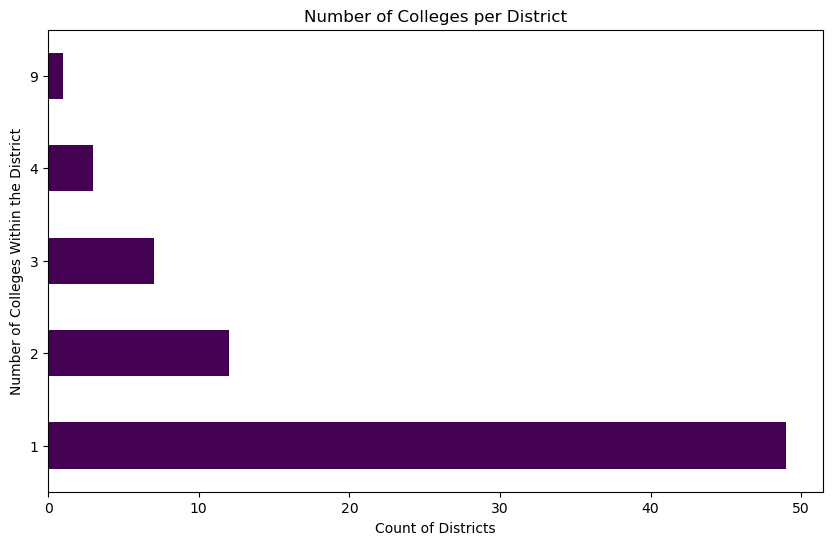

In [23]:
ax = all_districts["NumberOfColleges"].value_counts().plot(
    kind="barh",
    title="Number of Colleges per District",
    xlabel="Count of Districts",
    ylabel="Number of Colleges Within the District",
    figsize=(10, 6),
    rot=0,
    cmap='viridis'
)

#plt.savefig("./figures/number_of_colleges_per_district.png")
plt.show()

In [25]:
# If a distict has only one college, we'll call it a "Single College District"

all_districts.loc[
    all_districts["Colleges"].apply(len) == 1, "DistrictName"
] = "Single College District"

In [ ]:
all_districts["DistrictName"].value_counts()

DistrictName
Single College District                                    49
Grossmont-Cuyamaca                                          1
Kern                                                        1
Riverside                                                   1
South Orange County                                         1
Rancho Santiago                                             1
North Orange County                                         1
Coast                                                       1
Los Angeles                                                 1
Ventura County                                              1
Yosemite                                                    1
West Hills                                                  1
State Center                                                1
West Valley-Mission                                         1
Chabot-Las Positas                                          1
San José-Evergreen                                       

In [ ]:
# Append district data to the college dataset.

all_colleges = pd.merge(
    all_colleges,
    all_districts.drop(
        columns=[
            "StreetAddress",
            "City",
            "Zip",
            "Phone",
            "Boundaries",
            "Colleges",
        ]
    ),
    on='DistrictID',
    how='left',
    suffixes=('', 'District')
)

all_colleges.head()

,CollegeID,CollegeName,DistrictID,StreetAddress,City,County,Zip,ZipPlus4,MailingAddress,MailingCity,...,WebsiteURL,Latitude,Longitude,LogoURL,District,DistrictName,DistrictTitle,WebsiteURLDistrict,NumberOfColleges,CollegesPerDistrict
0,021,Cuyamaca College,020,900 Rancho San Diego Parkway,El Cajon,San Diego,92019,4304,900 Rancho San Diego Parkway,El Cajon,...,www.cuyamaca.edu,32.744890,-116.935229,CuyamacaCollegeLogo.jpg,None,Grossmont-Cuyamaca ...,Grossmont-Cuyamaca Community College District,www.gcccd.edu,2,2
1,022,Grossmont College,020,8800 Grossmont College Drive,El Cajon,San Diego,92020,1799,8800 Grossmont College Drive,El Cajon,...,www.grossmont.edu,32.817897,-117.005640,GrossmontCollegelogo.jpg,None,Grossmont-Cuyamaca ...,Grossmont-Cuyamaca Community College District,www.gcccd.edu,2,2
2,031,Imperial Valley College,030,380 East Aten Road,Imperial,Imperial,92251,9787,380 East Aten Road,Imperial,...,www.imperial.edu,32.825859,-115.502999,ImperialValleyCollegeLogocopy.jpg,None,Single College District,Imperial Community College District,www.imperial.edu,1,1
3,051,MiraCosta College,050,1 Barnard Drive,Oceanside,San Diego,92056,3899,1 Barnard Drive,Oceanside,...,www.miracosta.edu,33.188864,-117.301064,Mira_Costa_College_Logo_4c.png,None,Single College District,MiraCosta Community College District,www.miracosta.edu,1,1
4,061,Palomar College,060,1140 West Mission Road,San Marcos,San Diego,92069,1487,1140 West Mission Road,San Marcos,...,www.palomar.edu,33.147015,-117.183980,PalomarCollegeLogo.jpg,None,Single College District,Palomar Community College District,www.palomar.edu,1,1


In [30]:
fig = px.scatter_mapbox(
    all_colleges,
    lat="Latitude",
    lon="Longitude",
    hover_name="CollegeName",
    zoom=5,
    width=1200,
    height=800,
    color="DistrictName",
    title="Geographic Distribution of California Community Colleges",
    labels={
        "DistrictName": "District",
    },
)

fig.update_layout(
    mapbox_style="carto-positron",
    template="plotly_white",
)

fig.update_traces(marker=dict(size=6))

# fig.write_image(
#     "./figures/california_community_colleges_bw.png",
#     engine="kaleido"
# )
fig.write_html("./figures/california_community_colleges.html")
fig.show()

In [29]:
# Rank the districts by college count.

mc_district = all_districts.loc[all_districts["CollegesPerDistrict"] > 1, "DistrictID"]
all_colleges[all_colleges["DistrictID"].isin(mc_district)]["DistrictTitle"].value_counts()

DistrictTitle
Los Angeles Community College District            9
Los Rios Community College District               4
Peralta Community College District                4
State Center Community College District           4
Kern Community College District                   3
Ventura County Community College District         3
Riverside Community College District              3
Contra Costa Community College District           3
San Mateo County Community College District       3
Coast Community College District                  3
San Diego Community College District              3
South Orange County Community College District    2
Rancho Santiago Community College District        2
North Orange County Community College District    2
Grossmont-Cuyamaca Community College District     2
Yosemite Community College District               2
West Hills Community College District             2
West Valley-Mission Community College District    2
Chabot-Las Positas Community College District     

## Enrollment and Student Demographics

## Labor Market Projections